<a href="https://colab.research.google.com/github/EMMA-max-bit/Decision-Tree-and-Random-Forest/blob/main/DecisionTree%26RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import pandas
import pandas as pd

In [2]:
# importing a function to split the dataset for machine learning
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score


In [5]:
# import python libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [8]:
# load data
df = pd.read_csv("WineQT.csv")

In [9]:
# retrieve first five rows of WinQT.csv
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [10]:
# count how many times each value appears in the quality column of the DataFrame
df['quality'].value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


In [11]:
# dimension of the data
df.shape

(1143, 13)

In [12]:
# structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [13]:
# check for missing values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [14]:
# summary statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [15]:
# check for duplicate values
df.duplicated().sum()

np.int64(0)

In [16]:

X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']


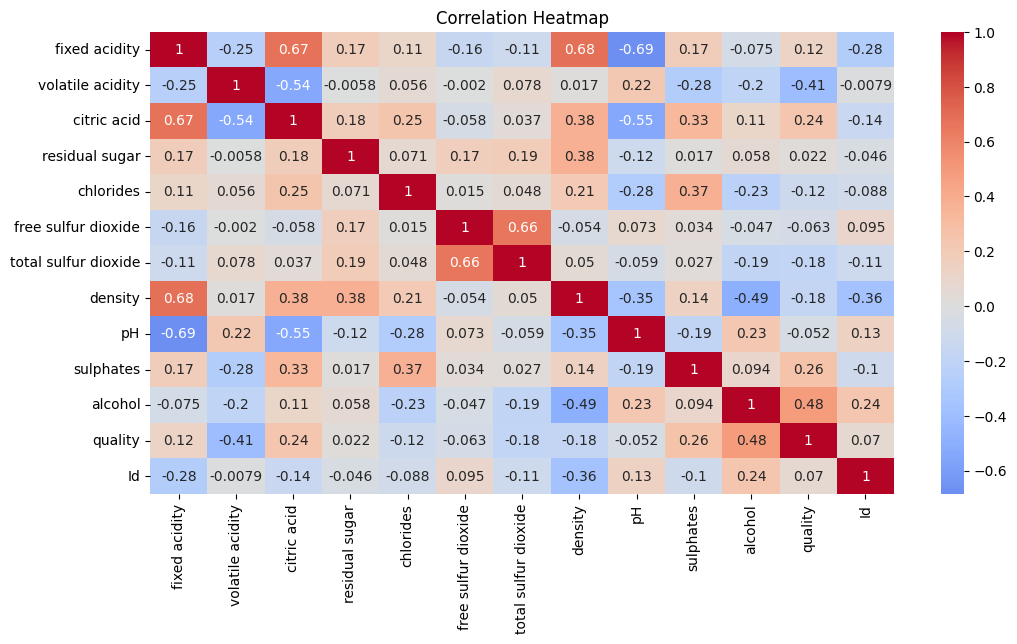

In [17]:
# creat a correlation heatmap to visualize how numerical columns in the DataFrame are related
plt.figure(figsize=(12, 6))   # Makes the plot 12 inches wide and 6 inches tall
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0) # Computes the correlation matrix of numeric columns for -1 and 1
plt.title('Correlation Heatmap')
plt.show()

In [18]:
correlation_matrix = df.corr()

In [19]:
target_correlation = correlation_matrix['quality'].sort_values(ascending=False)
print(target_correlation)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

In [22]:
X_train_standard = scaler_standard.fit_transform(X_train)

In [23]:
X_test_standard = scaler_standard.transform(X_test)

In [24]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
12,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5
758,9.9,0.32,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4
636,8.9,0.31,0.36,2.6,0.056,10.0,39.0,0.99562,3.40,0.69,11.8
1109,6.6,0.88,0.04,2.2,0.066,12.0,20.0,0.99636,3.53,0.56,9.9
743,7.6,0.42,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1
...,...,...,...,...,...,...,...,...,...,...,...
1044,6.7,1.04,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0
1095,8.0,0.39,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0
1130,7.4,0.35,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9
860,7.9,0.57,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5


In [25]:
X_train_standard

array([[ 0.1426802 , -1.40273053,  1.5096933 , ..., -0.09314751,
         0.56821234,  0.05661327],
       [ 0.96843134, -1.17920341,  1.5096933 , ..., -1.07474038,
         0.4477703 ,  0.89445566],
       [ 0.3786091 , -1.23508519,  0.4833938 , ...,  0.56124774,
         0.20688622,  1.26683005],
       ...,
       [-0.50612428, -1.01155806,  0.32944888, ...,  0.29948964,
        -0.33510296,  1.35992365],
       [-0.21121315,  0.21784112,  0.22681893, ..., -0.15858703,
         0.20688622, -0.87432272],
       [-0.44714205, -0.06156778,  0.6886537 , ..., -0.35490561,
        -0.09421888,  1.26683005]])

In [26]:
X_train_normalised = scaler_minmax.fit_transform(X_train)
X_test_normalised = scaler_minmax.transform(X_test)

In [27]:
X_train_normalised

array([[0.35454545, 0.10958904, 0.56      , ..., 0.44094488, 0.25149701,
        0.375     ],
       [0.48181818, 0.1369863 , 0.56      , ..., 0.32283465, 0.23952096,
        0.53571429],
       [0.39090909, 0.13013699, 0.36      , ..., 0.51968504, 0.21556886,
        0.60714286],
       ...,
       [0.25454545, 0.15753425, 0.33      , ..., 0.48818898, 0.16167665,
        0.625     ],
       [0.3       , 0.30821918, 0.31      , ..., 0.43307087, 0.21556886,
        0.19642857],
       [0.26363636, 0.2739726 , 0.4       , ..., 0.40944882, 0.18562874,
        0.60714286]])

In [28]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
158,6.8,0.610,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000
1081,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333
291,7.0,0.580,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000
538,7.8,0.480,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000
367,12.5,0.600,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000
...,...,...,...,...,...,...,...,...,...,...,...
66,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.500000
328,10.3,0.500,0.42,2.0,0.069,21.0,51.0,0.99820,3.16,0.72,11.500000
67,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.99650,3.45,0.56,10.700000
231,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.200000


In [29]:
X_test_standard

array([[-0.86001763,  0.44136825, -1.1586854 , ...,  0.69212679,
        -0.33510296, -0.87432272],
       [-0.8010354 ,  1.72664922, -0.28633082, ...,  1.41196156,
         0.38754928, -1.12257232],
       [-0.74205318,  0.2737229 , -0.7481656 , ...,  0.82300584,
        -1.0577552 ,  0.05661327],
       ...,
       [-0.86001763,  1.36341764, -1.3639453 , ...,  0.88844537,
        -0.57598704,  0.24280046],
       [ 1.02741357, -0.22921313, -0.3376458 , ..., -1.00930086,
         0.20688622, -1.15360352],
       [ 1.97112917, -0.3130358 ,  0.6886537 , ..., -1.59825658,
        -0.03399786, -0.37782353]])

In [30]:
X_test_normalised

array([[0.2       , 0.33561644, 0.04      , ..., 0.53543307, 0.16167665,
        0.19642857],
       [0.20909091, 0.49315068, 0.21      , ..., 0.62204724, 0.23353293,
        0.14880952],
       [0.21818182, 0.31506849, 0.12      , ..., 0.5511811 , 0.08982036,
        0.375     ],
       ...,
       [0.2       , 0.44863014, 0.        , ..., 0.55905512, 0.13772455,
        0.41071429],
       [0.49090909, 0.25342466, 0.2       , ..., 0.33070866, 0.21556886,
        0.14285714],
       [0.63636364, 0.24315068, 0.4       , ..., 0.25984252, 0.19161677,
        0.29166667]])

In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

In [32]:
rf_model.fit(X_train_standard, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [34]:
y_pred = rf_model.predict(X_test_standard)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6812227074235808


In [36]:
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

Precision: 0.6570795447441387


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 0  3  3  0  0]
 [ 0 76 20  0  0]
 [ 0 28 65  6  0]
 [ 0  0 11 15  0]
 [ 0  0  2  0  0]]


In [38]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)

In [39]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [40]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [41]:
y_pred_rf = rf_model.predict(X_test)

In [42]:
y_pred = dt_model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.611353711790393


In [44]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6899563318777293


In [45]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 1  3  2  0  0]
 [ 1 68 26  1  0]
 [ 0 25 65  9  0]
 [ 0  1 19  6  0]
 [ 0  0  0  2  0]]


In [46]:
precision = precision_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
precision

0.5957248597453656

Random Forest Classification


In [48]:
df = pd.read_csv("WineQT.csv")

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [51]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [52]:
X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']